In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

plt.rcParams['figure.figsize'] = 12,8

In [222]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


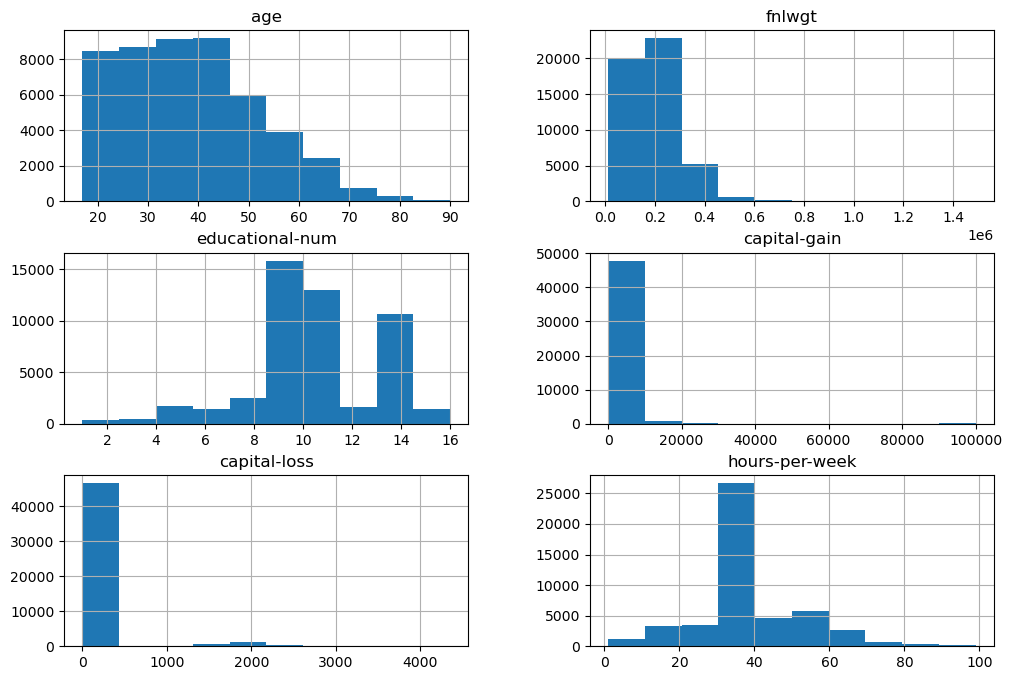

In [224]:
df.hist()
plt.show()

In [225]:
df['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [226]:
df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [227]:
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [228]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [229]:
df['gender'].value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [230]:
#  cat_values = df[['occupation','workclass','education','marital-status',
#              'relationship','race','native-country']]
# cat_val = df.select_dtypes(include=[object])
# cat_val

In [231]:
df = pd.concat([df.drop('occupation',axis=1),pd.get_dummies(df['occupation'],dtype=int).add_prefix('occupation_')],axis=1)
df = pd.concat([df.drop('workclass',axis=1),pd.get_dummies(df['workclass'],dtype=int).add_prefix('workclass_')],axis=1)
df = pd.concat([df.drop('marital-status',axis=1),pd.get_dummies(df['marital-status'],dtype=int).add_prefix('marital-status_')],axis=1)
df = pd.concat([df.drop('relationship',axis=1),pd.get_dummies(df['relationship'],dtype=int).add_prefix('relationship_')],axis=1)
df = pd.concat([df.drop('race',axis=1),pd.get_dummies(df['race'],dtype=int).add_prefix('race_')],axis=1)
df = pd.concat([df.drop('native-country',axis=1),pd.get_dummies(df['native-country'],dtype=int).add_prefix('native-country_')],axis=1)
df = df.drop('education',axis=1)



In [232]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,Male,7688,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,Female,0,0,30,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,Female,0,0,40,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,Male,0,0,20,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0


In [233]:
df['gender'] = df['gender'].apply(lambda x: 1 if x== 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x== '>50K' else 0)


In [234]:
df.columns

Index(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Nev

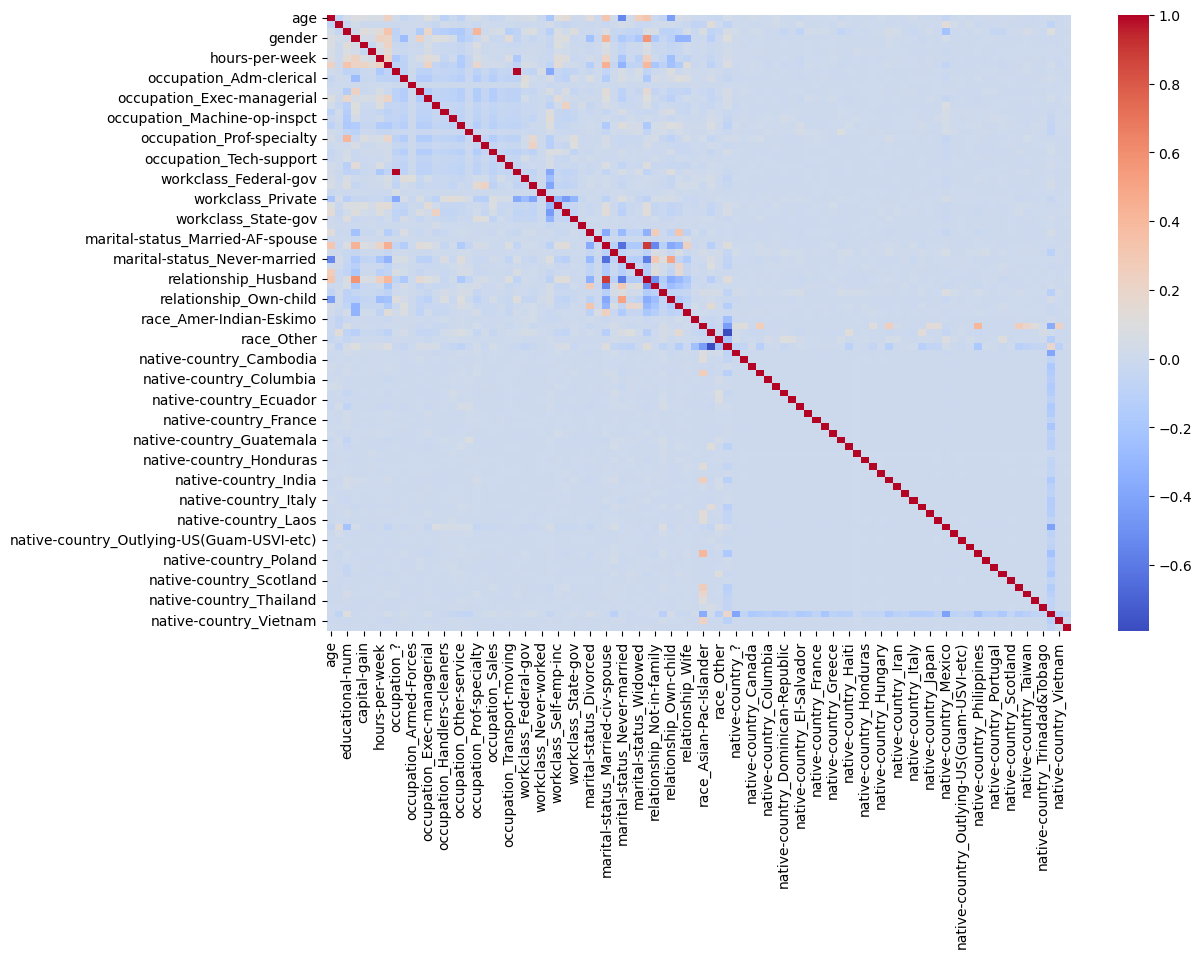

In [235]:
sns.heatmap(df.corr(),annot=False,cmap='coolwarm')
plt.show()

In [236]:
df.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.025683,-0.038116,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005405,0.007480,...,-0.013577,0.008708,-0.006523,-0.010342,-0.001733,-0.001512,0.004153,-0.070645,-0.007479,0.004699
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.080053,0.004142,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.063844,-0.260349,...,0.009649,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.011167,-0.001545,0.005262
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019157,-0.029105,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,-0.001766,-0.001512,0.007283,-0.007117,-0.002781,-0.002338,0.008558,-0.004219,-0.002575,-0.001157,...,-0.000919,-0.001525,-0.000514,-0.001204,-0.000905,1.000000,-0.000583,-0.073329,-0.001041,-0.000538
native-country_Trinadad&Tobago,0.001056,0.004153,-0.010201,-0.009342,-0.003039,0.004028,-0.002911,-0.009107,-0.002068,0.007917,...,-0.000872,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069564,-0.000988,-0.000510
native-country_United-States,0.011888,-0.070645,0.104210,-0.011167,0.004191,0.009449,0.004390,0.032551,0.005546,0.022126,...,-0.109626,-0.181890,-0.061346,-0.143695,-0.107976,-0.073329,-0.069564,1.000000,-0.124226,-0.064202
native-country_Vietnam,-0.012337,-0.007479,-0.007544,-0.001545,-0.002673,-0.000118,-0.008289,-0.015542,-0.004082,0.010905,...,-0.001557,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.124226,1.000000,-0.000912


In [237]:
corellation = df.corr()['income'].abs()
sorted_corelation = corellation.sort_values()
number_col_to_drop = int(0.8*len(df.columns))
cols_to_drop = sorted_corelation.iloc[:number_col_to_drop].index
df_droped = df.drop(cols_to_drop,axis=1)

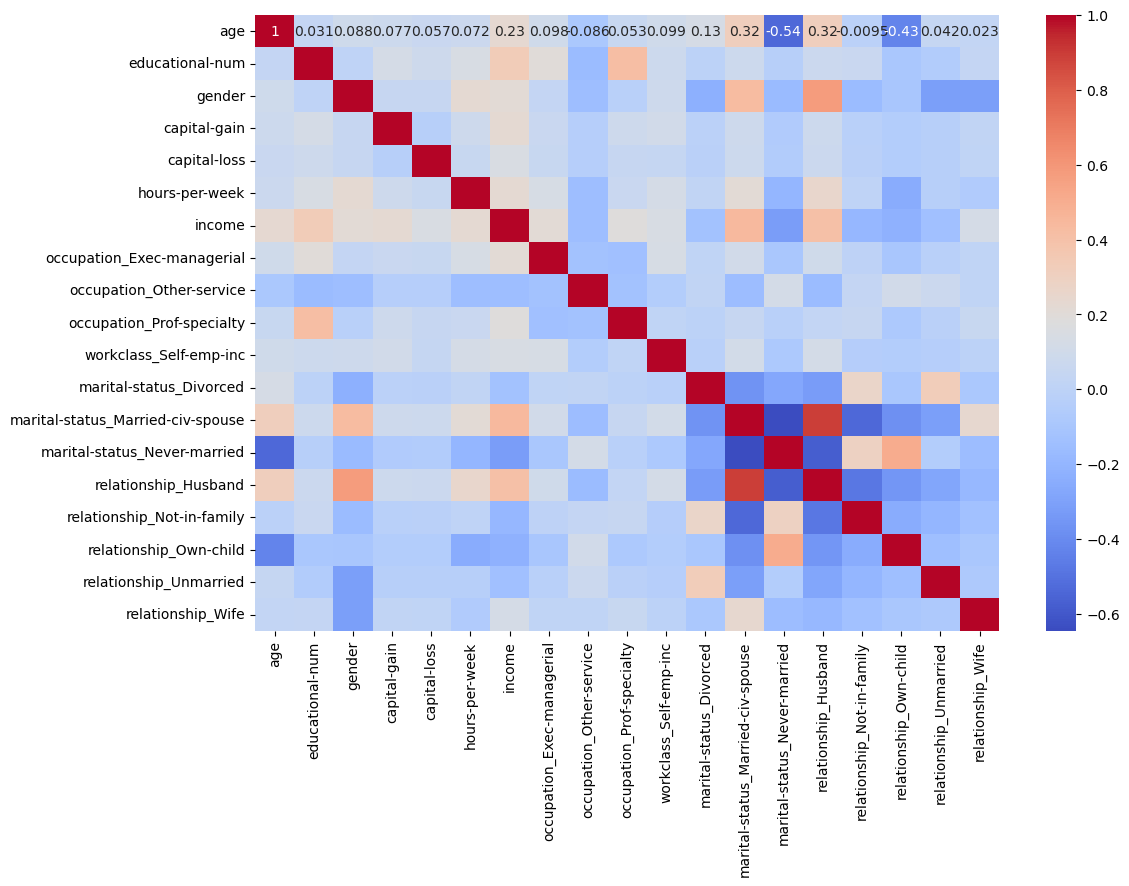

In [238]:
sns.heatmap(df_droped.corr(),annot=True,cmap='coolwarm')
plt.show()

In [239]:
df = df.drop('fnlwgt',axis=1)

In [240]:
X = df.drop('income',axis=1)
y = df['income']

In [241]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [242]:
forest = RandomForestClassifier()

In [243]:
forest.fit(X_train,y_train)

RandomForestClassifier()

In [244]:
forest.score(X_test,y_test)

0.8490121813901116

In [245]:
importances = dict(zip(forest.feature_names_in_,forest.feature_importances_))
importances = {k: v for k,v in sorted(importances.items(),key = lambda x: x[1],reverse=True)}

In [246]:
importances 

{'age': 0.23373290427445872,
 'educational-num': 0.12754751793116212,
 'hours-per-week': 0.11711217850337514,
 'capital-gain': 0.1116665890585479,
 'marital-status_Married-civ-spouse': 0.06848526403201029,
 'relationship_Husband': 0.04849377646460087,
 'capital-loss': 0.037376697559176414,
 'marital-status_Never-married': 0.021364514068570706,
 'occupation_Exec-managerial': 0.02041311830941154,
 'occupation_Prof-specialty': 0.01835658891146913,
 'gender': 0.013444224949088016,
 'relationship_Not-in-family': 0.011019788851336665,
 'relationship_Wife': 0.010525966130218773,
 'workclass_Private': 0.009236514253878158,
 'relationship_Own-child': 0.009138580909028712,
 'occupation_Other-service': 0.008348783724693427,
 'workclass_Self-emp-not-inc': 0.008278251063726205,
 'marital-status_Divorced': 0.006553995761234203,
 'occupation_Sales': 0.006431327905887171,
 'native-country_United-States': 0.006125018349999988,
 'race_White': 0.006083319249484684,
 'occupation_Craft-repair': 0.005931029

In [254]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50,100,150],
    'max_depth':[5,10,20,30,None],
    'min_samples_split':[2,4],
    'max_features':['sqrt','log2']
}

In [255]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid,verbose=10)


In [256]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5; 1/60] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/60] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.833 total time=   1.1s
[CV 2/5; 1/60] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/60] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.834 total time=   1.0s
[CV 3/5; 1/60] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/60] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.834 total time=   1.2s
[CV 4/5; 1/60] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/60] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.845 total time=   1.0s
[CV 5/5; 1/60] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 150]},
             verbose=10)

In [258]:
forest = grid_search.best_estimator_

In [259]:
forest.score(X_test,y_test)

0.8652881564131436

In [260]:
importances = dict(zip(forest.feature_names_in_,forest.feature_importances_))
importances = {k: v for k,v in sorted(importances.items(),key = lambda x: x[1],reverse=True)}

In [261]:
importances

{'capital-gain': 0.1561835689992955,
 'educational-num': 0.13311527295958983,
 'marital-status_Married-civ-spouse': 0.12075048071475535,
 'age': 0.09675416849885872,
 'hours-per-week': 0.06680766575704294,
 'relationship_Husband': 0.06663261883479163,
 'capital-loss': 0.04756734167795431,
 'marital-status_Never-married': 0.03952235679245274,
 'occupation_Exec-managerial': 0.028676475345229175,
 'occupation_Prof-specialty': 0.025681494078358125,
 'gender': 0.01970097971461223,
 'relationship_Not-in-family': 0.019601641392528086,
 'relationship_Own-child': 0.015662236388961453,
 'relationship_Wife': 0.013354552840978738,
 'occupation_Other-service': 0.012144280840769555,
 'relationship_Unmarried': 0.009705274109886678,
 'marital-status_Divorced': 0.009220838731131874,
 'workclass_Self-emp-not-inc': 0.008278137336087312,
 'workclass_Self-emp-inc': 0.007235398207351321,
 'workclass_Private': 0.00652397306202406,
 'occupation_Farming-fishing': 0.005660164490587387,
 'workclass_Federal-gov':